<a href="https://colab.research.google.com/github/torix/LectureOfComplexNetworks/blob/2019/ComplexNetwork01_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkXを使ったネットワークの登録と描画

ネットワーク描画のためにPythonのライブラリであるNetworkXを利用します．<br>




ネットワークのライブラリであるNetworkXと，描画用にmatplotlibの中のpyplotをインポートします．<br>
%matplotlib inlineはjupyter内でグラフを表示するためのおまじないです．







In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline



ノードとリンクを指定することでネットワークを作成します．<br>
ノードは任意のObject，リンクは二つのノードを追加指定することで作成されます．


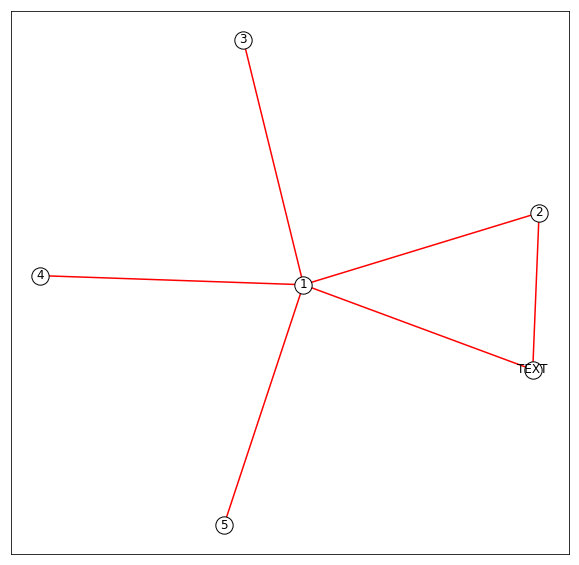

In [0]:
# 無向グラフを作成
G = nx.Graph() 
# 有向グラフの場合は
# G = nx.DiGraph()

# ノードの追加
## 単独で追加する場合
G.add_node(1)
## 複数のノードを同時に追加する場合
G.add_nodes_from([2, 3, 4])
## ノードとして任意のObjectを追加できる
G.add_node("TEXT")

# 辺の追加 (指定していないノードは自動的に追加される)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (1, 4), (1, "TEXT"), (1, 5)])

#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()


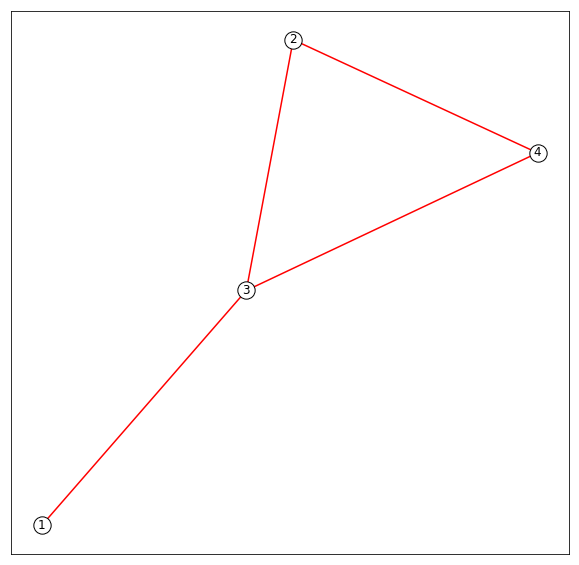

In [0]:
# 無向グラフを作成
G = nx.Graph() 

# ネットワークの作成
G.add_edges_from([(1,3), (2,3), (2,4),(3,4)])


#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()


ネットワークデータをファイルから読み込むことも可能．<br>
ファイル読み込みの簡易化のための関数readNetwork


In [0]:
import requests

def readNetwork(url):
  # ネットワークを読み込む
  res = requests.get(url)
  res.encoding = res.apparent_encoding
  #print(res.text)

  # edgeとして読み込める形式に変換
  d = list(item.split(",") for item in res.text.split("\n"))

  # 無向グラフを作成
  G = nx.Graph() 

  # ネットワークの作成
  G.add_edges_from(d)
  return G

readNetwork関数を使って，講義用ページからネットワークを読み込む

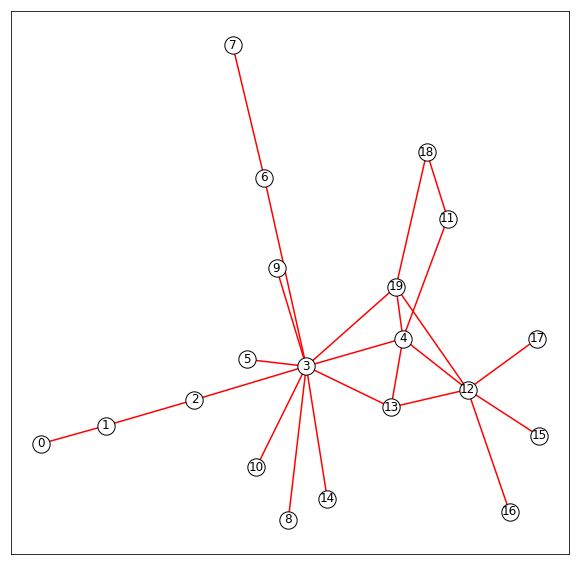

In [5]:
# ここでは，講義用のサイトから
G = readNetwork("http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/lec1-q2.csv")
#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()



[(1, 10), (2, 5), (3, 1), (4, 1), (5, 1), (6, 1), (10, 1)]


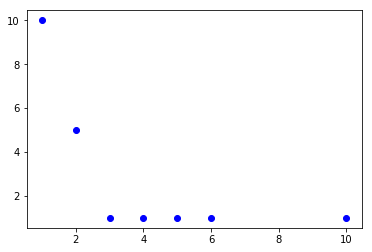

In [7]:
import collections

G = readNetwork("http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/lec1-q2.csv")

# 次数分布の表を作成
h = collections.Counter(dict(G.degree).values())
print(sorted(h.items(), key=lambda x:x[0]))


# 次数分布をプロットする
plt.plot(h.keys(), h.values(), 'bo')
#plt.xscale('log')
#plt.yscale('log')
plt.show()